# Task 1

a) Determine the minimum-distance partition using the K-Means method and the Euclidean distance.
Start by first determining the respective cluster centroids

In [62]:
import numpy as np

points = np.array([[1.2, 0.8], [-0.6, -1.3], [-0.8, 0.2], [0.2, 0.3]])
init_centers = [(points[0]+points[2])/2, (points[1]+points[3])/2]


In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init=init_centers, n_init=1)
kmeans.fit(points)


KMeans(init=[array([0.2, 0.5]), array([-0.2, -0.5])], n_clusters=2, n_init=1)

In [64]:
print("Initial centers: ", init_centers)
centers = kmeans.cluster_centers_
print("Final cluster centers: ",centers)


Initial centers:  [array([0.2, 0.5]), array([-0.2, -0.5])]
Final cluster centers:  [[ 0.7   0.55]
 [-0.7  -0.55]]


In [65]:
kmeans.labels_


array([0, 1, 1, 0], dtype=int32)

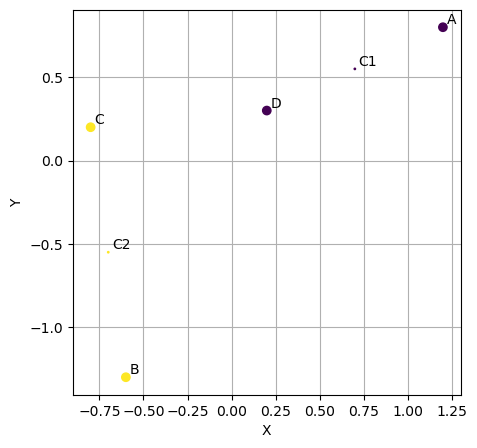

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(points.T[0], points.T[1], c=kmeans.labels_, label = "data points")
labels = ['A', 'B', 'C', 'D']
for i in range(len(labels)):
    ax.annotate(labels[i], points[i]+0.02)

ax.scatter(centers.T[0], centers.T[1], c=[0, 1], label = "centers", s=1)
labels = ['C1', 'C2']
for i in range(len(labels)):
    ax.annotate(labels[i], centers[i]+0.02)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
plt.show()


In [67]:
# try to build a class by oneself
import numpy as np

class k_means_algorithm():
    def __init__(self, k=2):
        self.k = k
        print("OK. Fine")
        return 

    def fit(self, points):
        self.label_ = np.zeros(points.shape[0])
        self.points = points
        for i in range(10):
            label = self.label_.copy()
            self.__clustering(self.points)
            if (self.label_ == label).all():
                break
            self.__recenter()
        return
    
    def assign_centroids(self, centroids):
        self.centroids = np.array(centroids)
        assert self.centroids.shape[0] == self.k

    def __calculate_distance(self, p, c):
        return (p-c)@(p-c)
    
    def __clustering(self, pts):
        for i in range(pts.shape[0]):
            dist = np.inf
            for j in range(self.k):
                p = pts[i]; c = self.centroids[j]
                new_dist = self.__calculate_distance(p, c)
                if new_dist < dist:
                    self.label_[i] = j
                    dist = new_dist
    
    def __recenter(self):
        for i in range(self.k):
            self.centroids[i] = np.mean(self.points[self.label_ == i], axis=0)
            


In [68]:
test_alg = k_means_algorithm()
test_alg.assign_centroids(init_centers)
test_alg.fit(points)
print(test_alg.centroids)
print(test_alg.label_)


OK. Fine
[[ 0.7   0.55]
 [-0.7  -0.55]]
[0. 1. 1. 0.]


b) Calculate the Silhouette Coefficients in Python and visualize them

In [69]:
from sklearn.metrics import silhouette_score
print("There are only 4 samples in the dataset, therefore the number of \
clusters ranges from 2 to 3.")
s_score = []
n_cl = points.shape[0] # number of clusters

for i in range(2, n_cl):
    kmeans = KMeans(n_clusters=i, n_init=25)
    kmeans.fit(points)
    s_score.append(silhouette_score(points, kmeans.labels_))


There are only 4 samples in the dataset, therefore the number of clusters ranges from 2 to 3.


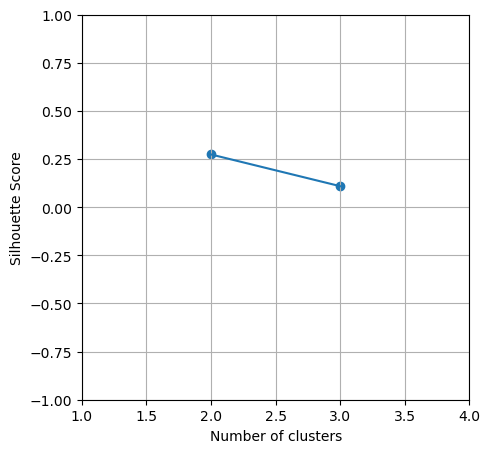

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter([2, 3], s_score)
ax.plot([2, 3], s_score)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
ax.set_xlim(1, 4)
ax.set_ylim(-1, 1)
ax.grid()
plt.show()


c) Briefly describe what silhouettes are calculated for, explain the meaning of negative values, and indicate
what the silhouette coefficient represents.

Sihouettes coefficients are calculated for the selecting the correct number of clusters (K). It calculates relative differences of the intra-cluster distances and inter-cluster distances. The distances are the mean value of the distance selected centroid to the target.

- A coefficient of 1 means that the centroids selected are representative and lies in the correct clusters. 0 means that the clusters are overlapping (similar distance to the centroid).
- A coefficient of -1 means that the centroids was wrongly put in the clusters since the nearest cluster have ever shorter distance to the centroid than the current one.

# Task 2

https://www.youtube.com/watch?v=YH0r47m0kFM

In [71]:
import pandas as pd

df = pd.read_csv("../../original_files/exercises/Sheet 4/data/distancematrix.csv", delimiter=";", index_col=0)
df = df.combine_first(df.T)
df


,A,B,C,D
A,0.000,4.438,3.048,2.259
B,4.438,0.000,6.777,2.887
C,3.048,6.777,0.000,4.339
D,2.259,2.887,4.339,0.000


In [18]:
from sklearn.cluster import AgglomerativeClustering

average_link = AgglomerativeClustering(n_clusters=2, linkage="average", metric=\
    "precomputed", compute_distances = True)
average_link.fit(df.to_numpy())


AgglomerativeClustering(compute_distances=True, linkage='average',
                        metric='precomputed')

In [19]:
average_link.labels_


array([0, 0, 1, 0])

In [20]:
average_link.children_


array([[0, 3],
       [1, 4],
       [2, 5]])

In [21]:
average_link.distances_


array([2.259     , 3.6625    , 4.72133333])

In [6]:
import numpy as np
counts = np.zeros(average_link.children_.shape[0])
n_samples = len(average_link.labels_)
for i, merge in enumerate(average_link.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


In [22]:
linkage_matrix = np.column_stack(
        [average_link.children_, average_link.distances_, counts]
    ).astype(float)


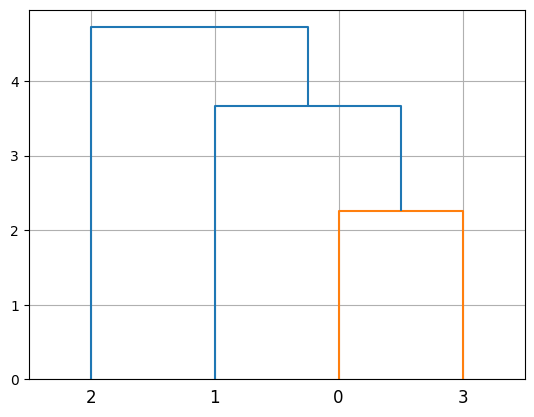

In [23]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# Plot the corresponding dendrogram
dendrogram(linkage_matrix)
plt.grid()
plt.show()


b) How do partitioning methods differ from hierarchical methods? (1 P.)

The partitioning methods have clusters with no hiearchical structure(i.e. flat with only one granuarity level). The clusters may not or may have only minor overlaps depending on whether the hard, soft or disjoint clustering is applied.


On the other hand, hiearchical clusters are nested and have high overlaps. The clusters at higher level includes many of the lower level clusters.

c) Explain hard clustering and soft clustering.

Hard clustering provides a deterministic result, the samples are classified to
either one cluster or another. The clusters have clear boundaries.

On the contrary, soft clustering provides a probabilistic classification. The samples will be assigned with probabilities of being in a cluster. The boundaries of the clusters are not clear.

d) Briefly describe when density-based clustering techniques are used and the advantages and disadvantages. 

The density-based clustering techniques are used when the shape of the cluster
is rather irregular and therefore the samples can't be easily classified by
distance-based methods (the clusters are often refers to as a convex set).

Advantage: it can be applied to arbitrary shapes of clusters.

Disadvantage: many density based methods are sensitive to parameters, i.e. a
slightly different input might cause very different results.
